In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

from tqdm import tqdm

In [48]:
# Carregar o dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adicionar a coluna alvo (0 = maligno, 1 = benigno)

/tmp/ipykernel_15696/1358770814.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['target'], palette=['red', 'blue'])


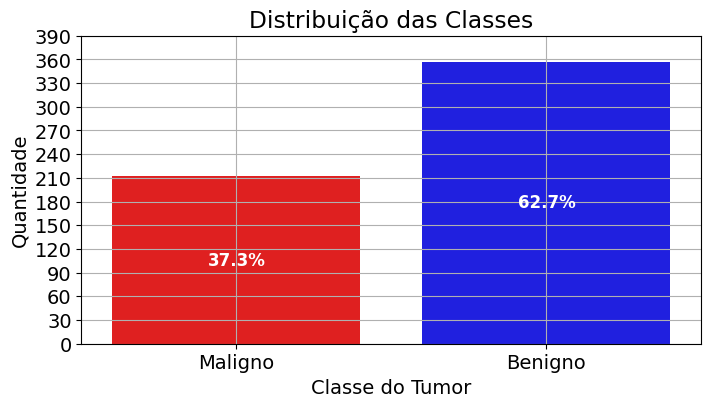

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Contar a distribuição das classes
class_counts = df['target'].value_counts()
total = len(df)

# Criar o gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.countplot(x=df['target'], palette=['red', 'blue'])

# Adicionar rótulos percentuais no centro de cada barra
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height() / 2),  # Posição central
                ha='center', va='center', fontsize=12, color='white', weight='bold')

# Personalizar eixo x e y
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.yticks(np.arange(0, 400, 30))
plt.xlabel('Classe do Tumor')
plt.ylabel('Quantidade')
plt.title('Distribuição das Classes')
plt.grid()

# Ajustar tamanho da fonte
plt.rcParams.update({'font.size': 14})

# Salvar e exibir o gráfico
plt.savefig('distribuicao_classes.jpg', bbox_inches='tight')
plt.show()


/tmp/ipykernel_15696/3023395538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=['red', 'blue'])


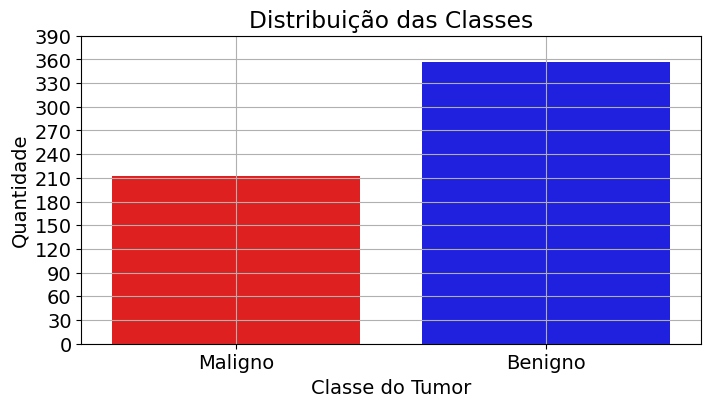

In [49]:
# Visualizar distribuição das classes
plt.figure(figsize=(8, 4))
sns.countplot(x=df['target'], palette=['red', 'blue'])
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.yticks(np.arange(0,400,30))

plt.xlabel('Classe do Tumor')
plt.ylabel('Quantidade')
plt.title('Distribuição das Classes')
plt.grid()
plt.rcParams.update({'font.size': 14})
plt.savefig('distribuicao_classes.jpg', bbox_inches='tight')
plt.show()

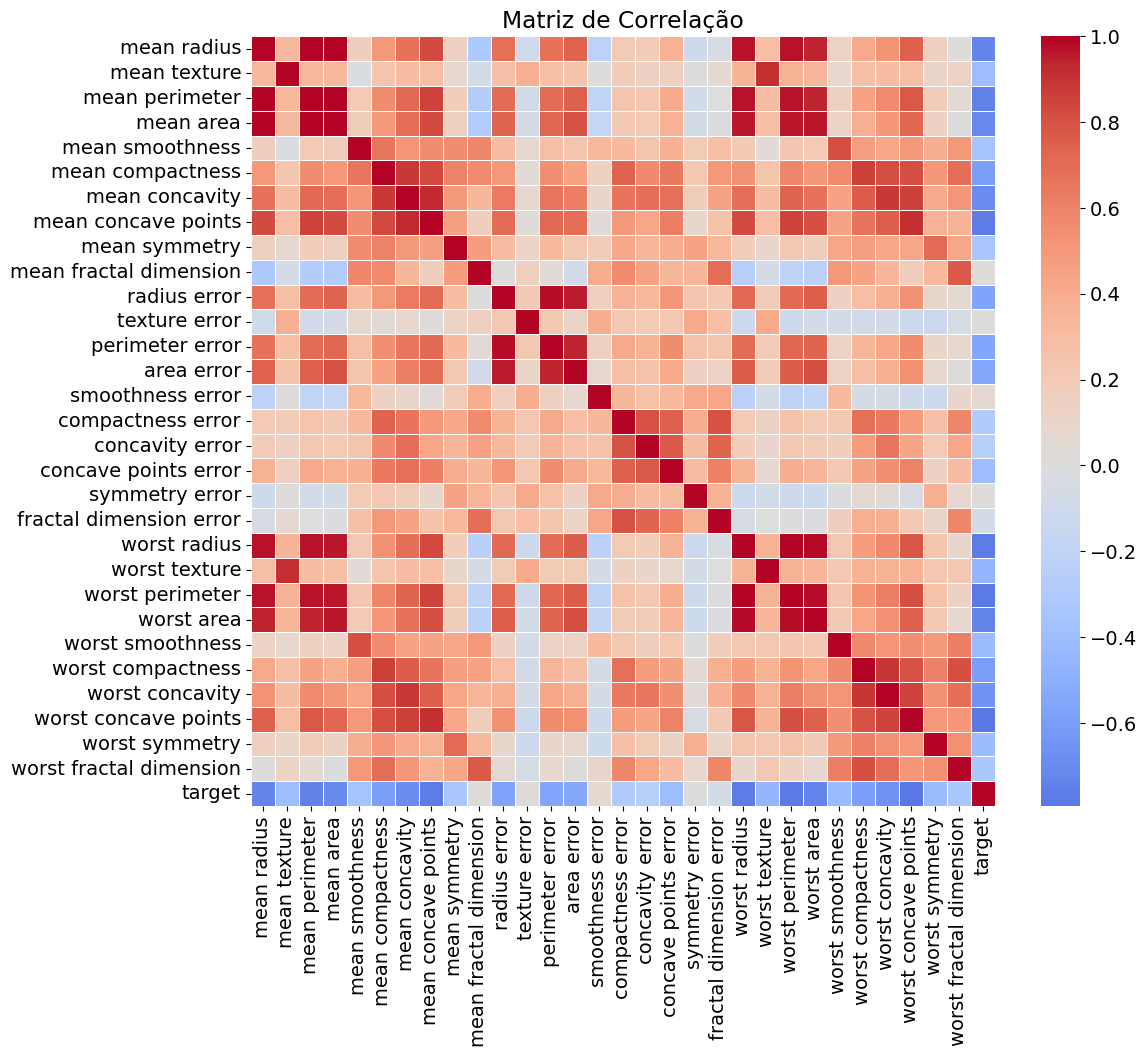

In [51]:
# Gerar heatmap da correlação entre variáveis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

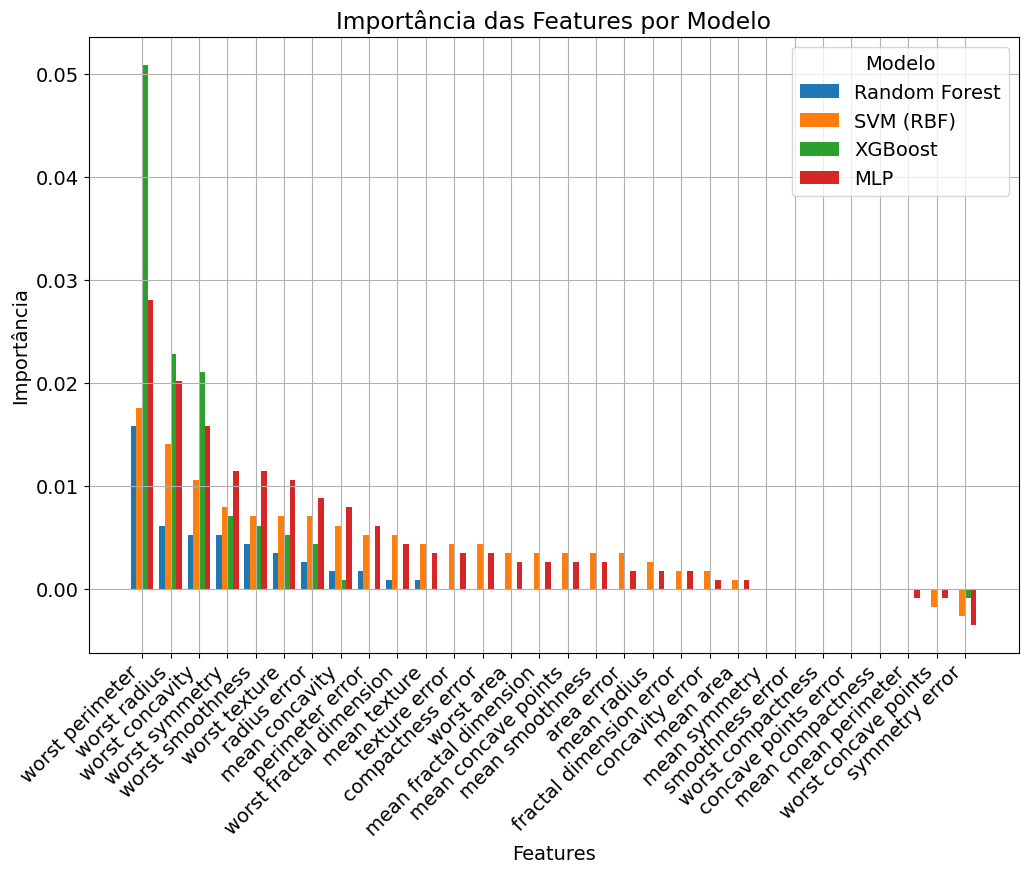

In [59]:
X, y = data.data, data.target
feature_names = data.feature_names

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=15, random_state = 42),
    "SVM (RBF)": SVC(C=100, kernel='rbf', gamma=0.001, class_weight='balanced', random_state = 42),
    "XGBoost": XGBClassifier(n_estimators=20, objective='binary:logistic', tree_method='hist', eta=0.1,
                             max_depth=3, enable_categorical=True, random_state = 42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 100, 100, 50), activation='tanh', solver='sgd',
                         max_iter=500, alpha=0.001, random_state = 42)
}

top_features = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)

    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean

    sorted_idx = np.argsort(importances)[::-1][:]
    top_features[name] = (np.array(feature_names)[sorted_idx], importances[sorted_idx])

# Criar gráfico comparativo
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

bar_width = 0.2  # Largura das barras
x = np.arange(len(sorted_idx))  # Posições das categorias

for i, (model_name, (features, importance)) in enumerate(top_features.items()):
    plt.bar(x + i * bar_width, importance, width=bar_width, label=model_name)

plt.xticks(x + bar_width * (len(classifiers) / 2 - 0.5), features, rotation=45, ha="right")

plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features por Modelo")
plt.legend(title="Modelo")
plt.grid()
#plt.savefig('features_importance.jpg', bbox_inches='tight')
plt.show()


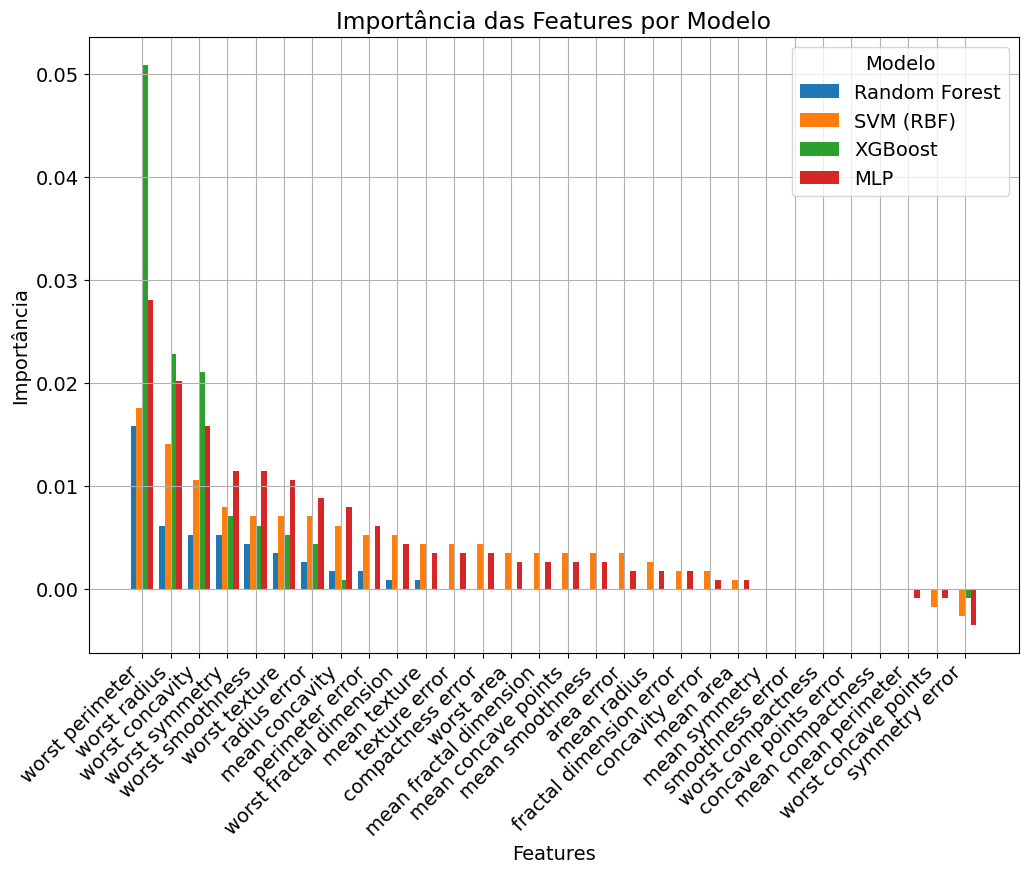

In [58]:
X, y = data.data, data.target
feature_names = data.feature_names

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=15, random_state = 42),
    "SVM (RBF)": SVC(C=100, kernel='rbf', gamma=0.001, class_weight='balanced', random_state = 42),
    "XGBoost": XGBClassifier(n_estimators=20, objective='binary:logistic', tree_method='hist', eta=0.1,
                             max_depth=3, enable_categorical=True, random_state = 42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 100, 100, 50), activation='tanh', solver='sgd',
                         max_iter=500, alpha=0.001, random_state = 42)
}

top_features = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)

    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean

    sorted_idx = np.argsort(importances)[::-1][:]
    top_features[name] = (np.array(feature_names)[sorted_idx], importances[sorted_idx])

# Criar gráfico comparativo
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

bar_width = 0.2  # Largura das barras
x = np.arange(len(sorted_idx))  # Posições das categorias

for i, (model_name, (features, importance)) in enumerate(top_features.items()):
    plt.bar(x + i * bar_width, importance, width=bar_width, label=model_name)

plt.xticks(x + bar_width * (len(classifiers) / 2 - 0.5), features, rotation=45, ha="right")

plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features por Modelo")
plt.legend(title="Modelo")
plt.grid()
#plt.savefig('features_importance.jpg', bbox_inches='tight')
plt.show()


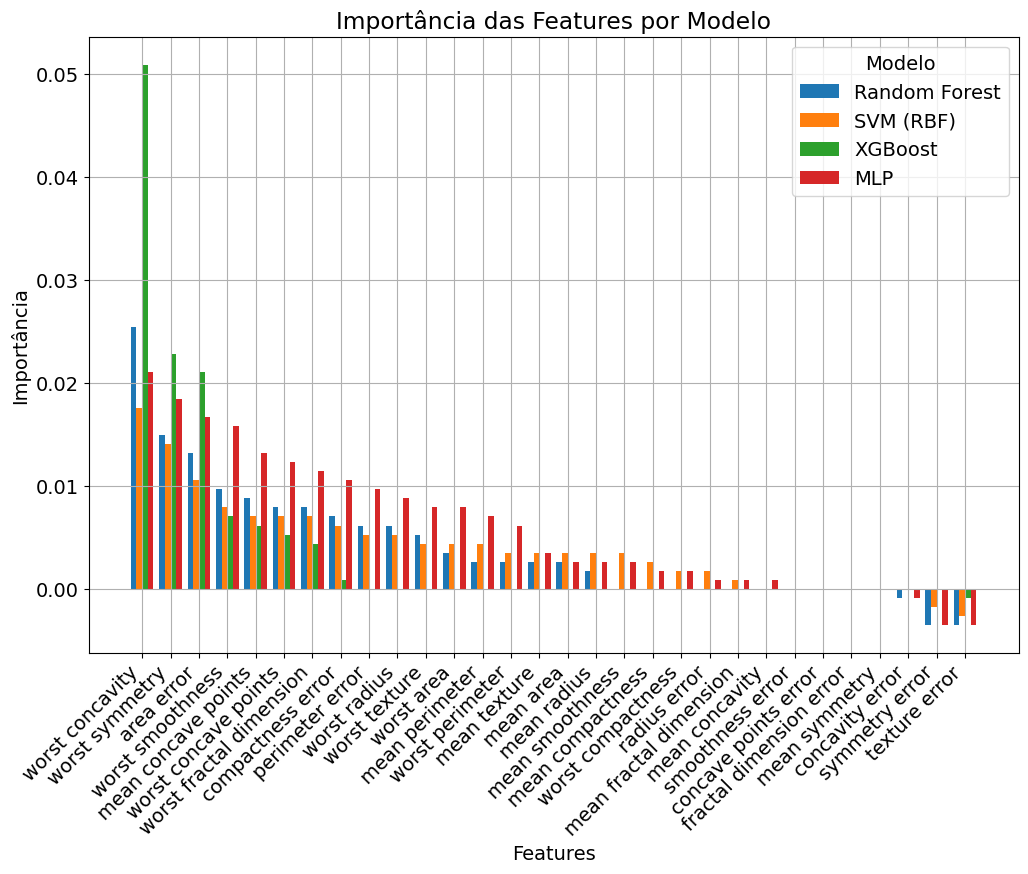

In [56]:
X, y = data.data, data.target
feature_names = data.feature_names

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=15, random_state = 42),
    "SVM (RBF)": SVC(C=100, kernel='rbf', gamma=0.001, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=20, objective='binary:logistic', tree_method='hist', eta=0.1,
                             max_depth=3, enable_categorical=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(50, 100, 100, 50), activation='tanh', solver='sgd',
                         max_iter=500, alpha=0.001)
}

top_features = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)

    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean

    sorted_idx = np.argsort(importances)[::-1][:]
    top_features[name] = (np.array(feature_names)[sorted_idx], importances[sorted_idx])

# Criar gráfico comparativo
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})

bar_width = 0.2  # Largura das barras
x = np.arange(len(sorted_idx))  # Posições das categorias

for i, (model_name, (features, importance)) in enumerate(top_features.items()):
    plt.bar(x + i * bar_width, importance, width=bar_width, label=model_name)

plt.xticks(x + bar_width * (len(classifiers) / 2 - 0.5), features, rotation=45, ha="right")

plt.xlabel("Features")
plt.ylabel("Importância")
plt.title("Importância das Features por Modelo")
plt.legend(title="Modelo")
plt.grid()
#plt.savefig('features_importance.jpg', bbox_inches='tight')
plt.show()


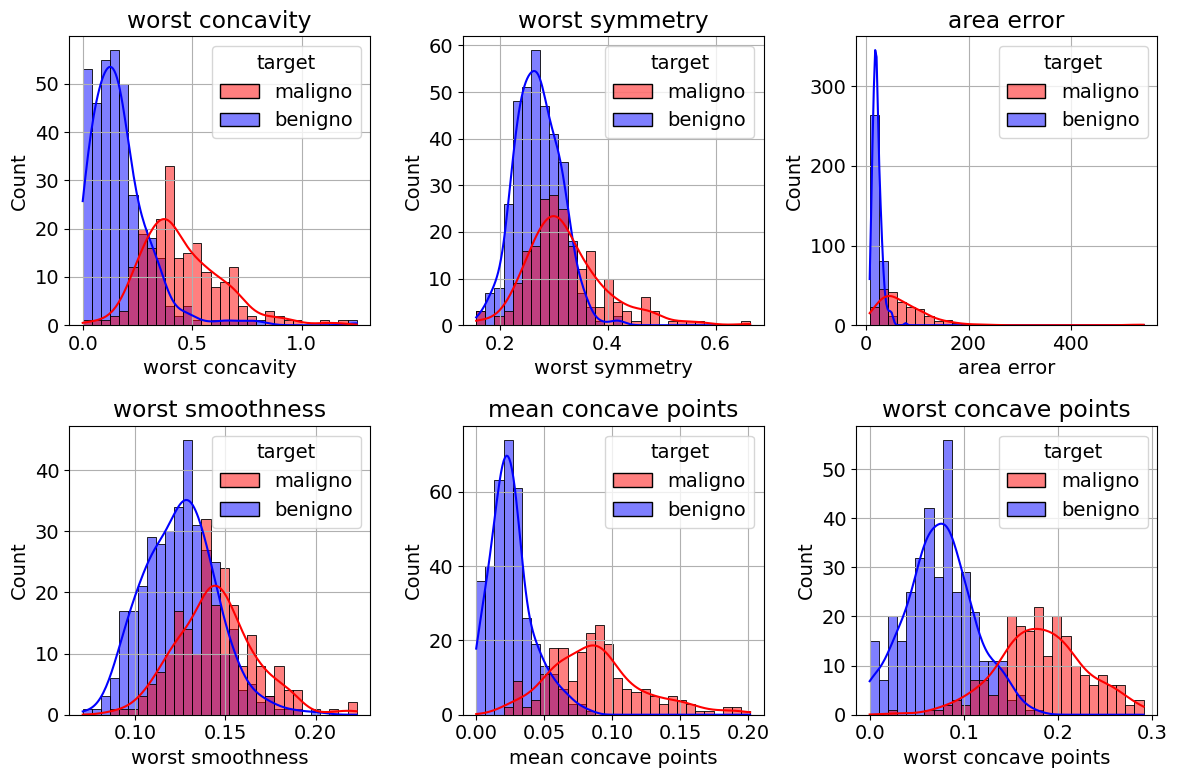

In [57]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adicionar a coluna alvo (0 = maligno, 1 = benigno)
df["target"] = df["target"].replace({0:'maligno', 1:'benigno'})

important_features = features[:6].tolist()

plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, hue='target', bins=30, kde=True, palette=['red', 'blue'])
    plt.title(feature)
    plt.grid()
plt.tight_layout()
#plt.savefig('distribuicao_top_6_features.jpg')
plt.show()